### Ricevuto in input un file in formato FASTQ di reads di lunghezza `L` costante, generare in output i tre seguenti report:

- Contenuto per base:
    - Produrre per ogni posizione `i` da 1 a `L` la proporzione di ogni base A,C,G,T nei reads in input, segnalando eventualmente la presenza di basi diverse.
- Mediana di qualità per base:
    - Produrre per ogni posizione `i` da 1 a `L` la il valore mediano della qualità delle reads in input
- Media di qualità per base:
    - Produrre per ogni posizione `i` da 1 a `L` la il valore medio della qualità delle reads in input

Importa `math` per alcune funzioni utili (es. `floor`)

In [1]:
import math

#### Caricamento del file

In [2]:
file_path = './input.fastq'

#### Lettura del file in righe

In [3]:
with open(file_path) as file:
    lines = file.read().splitlines()

In [4]:
lines


['@HWUSI-EAS522:8:5:662:692#0/1',
 'TOTGGAGGCCCAACTTCTTGTATTCACAGGTTCTGC',
 '+HWUSI-EAS522:8:5:662:692#0/1',
 'aaaa`aa`aa`]__`aa`_U[_a`^\\\\UTWZ`X^QX',
 '@HWUSI-EAS522:8:5:662:693#0/1',
 'TCTGCCAACTTCTTATGGAGGCCTGTATTCACAGGT',
 '+HWUSI-EAS522:8:5:662:693#0/1',
 'Aaaa`aa`aa`]__`:a`_U;_A`^\\\\UTWZ`X^QX',
 '@HWUSI-EAS522:8:5:662:694#0/1',
 'TCTGCCAGAGGCCTGTATTCACAGGTACTTCTTATG',
 '+HWUSI-EAS522:8:5:662:694#0/1',
 'aaaa`aa`aa`]__`aa`_u[_a`^\\\\utwz`x^QX',
 '@HWUSI-EAS522:8:5:662:695#0/1',
 'TCGCCTGTATTCACAGGTTGCCAACTTCTTATGGAG',
 '+HWUSI-EAS522:8:5:662:695#0/1',
 'AaaA`aa`aa`]__`:A`_U;_A`^\\\\UTWZ`X^QX']

In [5]:
number_of_sequences = math.floor(len(lines) / 4)

Sappiamo che le read hanno lunghezza costante `L` per cui possiamo prendere una qualsiasi delle sequenze per verificarne la lunghezza

In [6]:
read_length = len(lines[1])

In [7]:
read_and_quality = [ [(lines[read_index][index],  lines[read_index + 2][index]) for read_index in range(1, len(lines), 4)] 
                            
                            for index in range(0, read_length)]

In [8]:
read_and_quality

[[('T', 'a'), ('T', 'A'), ('T', 'a'), ('T', 'A')],
 [('O', 'a'), ('C', 'a'), ('C', 'a'), ('C', 'a')],
 [('T', 'a'), ('T', 'a'), ('T', 'a'), ('G', 'a')],
 [('G', 'a'), ('G', 'a'), ('G', 'a'), ('C', 'A')],
 [('G', '`'), ('C', '`'), ('C', '`'), ('C', '`')],
 [('A', 'a'), ('C', 'a'), ('C', 'a'), ('T', 'a')],
 [('G', 'a'), ('A', 'a'), ('A', 'a'), ('G', 'a')],
 [('G', '`'), ('A', '`'), ('G', '`'), ('T', '`')],
 [('C', 'a'), ('C', 'a'), ('A', 'a'), ('A', 'a')],
 [('C', 'a'), ('T', 'a'), ('G', 'a'), ('T', 'a')],
 [('C', '`'), ('T', '`'), ('G', '`'), ('T', '`')],
 [('A', ']'), ('C', ']'), ('C', ']'), ('C', ']')],
 [('A', '_'), ('T', '_'), ('C', '_'), ('A', '_')],
 [('C', '_'), ('T', '_'), ('T', '_'), ('C', '_')],
 [('T', '`'), ('A', '`'), ('G', '`'), ('A', '`')],
 [('T', 'a'), ('T', ':'), ('T', 'a'), ('G', ':')],
 [('C', 'a'), ('G', 'a'), ('A', 'a'), ('G', 'A')],
 [('T', '`'), ('G', '`'), ('T', '`'), ('T', '`')],
 [('T', '_'), ('A', '_'), ('T', '_'), ('T', '_')],
 [('G', 'U'), ('G', 'U'), ('C',

A questo è possibile iniziare ad elaborare i dati.
Per ricavare la proporzione di ogni base è possibile utilizzare una lista di tuple.
Ogni tupla conterrà un `Counter` per le basi `A` `C` `G` `T` e una lista con le basi diverse da `A` `C` `G` `T`

In [9]:
from collections import Counter

In [10]:
def get_base(base_info):
    base = base_info[0]
    return base

In [11]:
proportion_dict_list = []
for i in range(0, read_length):
    # Inizializzare un counter vuoto aiuta successivamente nella creazione del grafico
    counter = Counter({'A' : 0, 'C': 0, 'T': 0, 'G': 0})
    list_for_index = read_and_quality[i];
    converted = list(map(get_base, list_for_index))
    other_bases = list(filter(lambda x: x not in ['A', 'T', 'C', 'G'], converted))
    atcg_bases = list(filter(lambda x: x in ['A', 'T', 'C', 'G'], converted))
    counter.update(atcg_bases)
    proportion_dict_list.append((counter, other_bases))

In [12]:
proportion_dict_list

[(Counter({'A': 0, 'C': 0, 'T': 4, 'G': 0}), []),
 (Counter({'A': 0, 'C': 3, 'T': 0, 'G': 0}), ['O']),
 (Counter({'A': 0, 'C': 0, 'T': 3, 'G': 1}), []),
 (Counter({'A': 0, 'C': 1, 'T': 0, 'G': 3}), []),
 (Counter({'A': 0, 'C': 3, 'T': 0, 'G': 1}), []),
 (Counter({'A': 1, 'C': 2, 'T': 1, 'G': 0}), []),
 (Counter({'A': 2, 'C': 0, 'T': 0, 'G': 2}), []),
 (Counter({'A': 1, 'C': 0, 'T': 1, 'G': 2}), []),
 (Counter({'A': 2, 'C': 2, 'T': 0, 'G': 0}), []),
 (Counter({'A': 0, 'C': 1, 'T': 2, 'G': 1}), []),
 (Counter({'A': 0, 'C': 1, 'T': 2, 'G': 1}), []),
 (Counter({'A': 1, 'C': 3, 'T': 0, 'G': 0}), []),
 (Counter({'A': 2, 'C': 1, 'T': 1, 'G': 0}), []),
 (Counter({'A': 0, 'C': 2, 'T': 2, 'G': 0}), []),
 (Counter({'A': 2, 'C': 0, 'T': 1, 'G': 1}), []),
 (Counter({'A': 0, 'C': 0, 'T': 3, 'G': 1}), []),
 (Counter({'A': 1, 'C': 1, 'T': 0, 'G': 2}), []),
 (Counter({'A': 0, 'C': 0, 'T': 3, 'G': 1}), []),
 (Counter({'A': 1, 'C': 0, 'T': 3, 'G': 0}), []),
 (Counter({'A': 0, 'C': 1, 'T': 0, 'G': 3}), []

A questo punto è visualizzare il risultato con un grafico

In [13]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

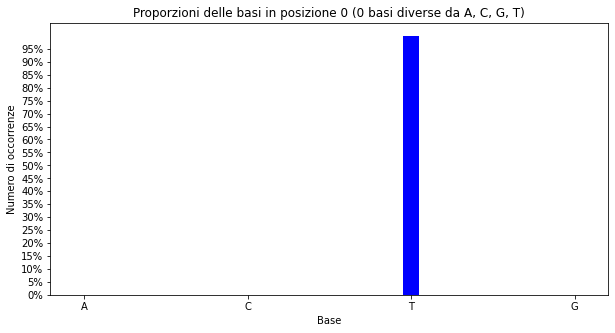

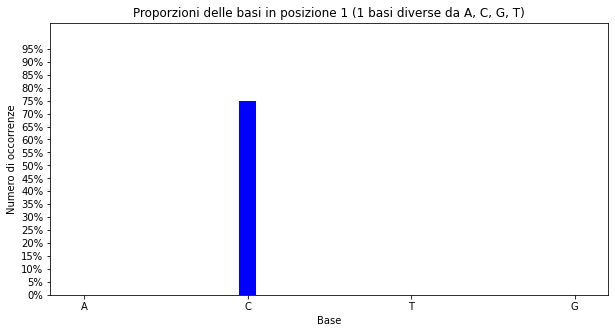

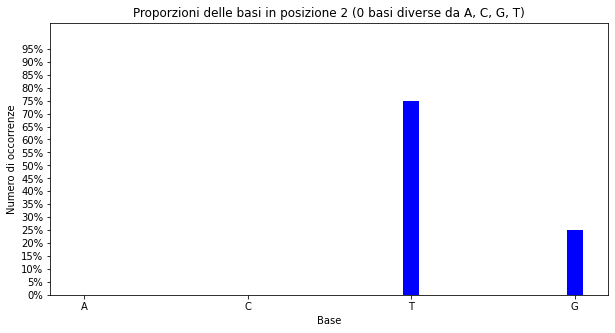

In [14]:
for (index, item) in enumerate(proportion_dict_list[0:3]):
    data = item[0]
    basi = list(data.keys())
    values = [(data[i] / len(data) - len() * 100) for i in data]
  
    fig = plt.figure(figsize = (10, 5))
    ax = fig.gca()        
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    
    plt.bar(basi, values, color ='blue', width = 0.1)
    plt.ylim([0, 105])
    plt.yticks([i for i in range(0, 100, 5)])

    plt.xlabel("Base")
    plt.ylabel("Numero di occorrenze")
    plt.title("Proporzioni delle basi in posizione %s (%s basi diverse da A, C, G, T)" %(index, len(item[1])))
    plt.show()

A questo punto è possibile effettuare il calcolo della media e della mediana.
Per prima cosa definiamo una funzione in grado di restituire un valore numerico a partire da un valore del formato FASTQ.

In [15]:
def ascii_to_quality(c):
    return ord(c)-33

In [16]:
def convert_ascii_to_int(tupleval):
    return (tupleval[0], ascii_to_quality(tupleval[1]))

In [17]:
read_and_quality_converted =  list(map(lambda reads: [convert_ascii_to_int(item) for item in reads], read_and_quality))

In [18]:
read_and_quality_converted

[[('T', 64), ('T', 32), ('T', 64), ('T', 32)],
 [('O', 64), ('C', 64), ('C', 64), ('C', 64)],
 [('T', 64), ('T', 64), ('T', 64), ('G', 64)],
 [('G', 64), ('G', 64), ('G', 64), ('C', 32)],
 [('G', 63), ('C', 63), ('C', 63), ('C', 63)],
 [('A', 64), ('C', 64), ('C', 64), ('T', 64)],
 [('G', 64), ('A', 64), ('A', 64), ('G', 64)],
 [('G', 63), ('A', 63), ('G', 63), ('T', 63)],
 [('C', 64), ('C', 64), ('A', 64), ('A', 64)],
 [('C', 64), ('T', 64), ('G', 64), ('T', 64)],
 [('C', 63), ('T', 63), ('G', 63), ('T', 63)],
 [('A', 60), ('C', 60), ('C', 60), ('C', 60)],
 [('A', 62), ('T', 62), ('C', 62), ('A', 62)],
 [('C', 62), ('T', 62), ('T', 62), ('C', 62)],
 [('T', 63), ('A', 63), ('G', 63), ('A', 63)],
 [('T', 64), ('T', 25), ('T', 64), ('G', 25)],
 [('C', 64), ('G', 64), ('A', 64), ('G', 32)],
 [('T', 63), ('G', 63), ('T', 63), ('T', 63)],
 [('T', 62), ('A', 62), ('T', 62), ('T', 62)],
 [('G', 52), ('G', 52), ('C', 84), ('G', 52)],
 [('T', 58), ('G', 26), ('A', 58), ('C', 26)],
 [('A', 62), 

In [19]:
import numpy as np

In [20]:
def get_values_from_read(read):
    return list(map(lambda value_and_quality: value_and_quality[1], read));

In [21]:
qualities =  list(map(lambda val: get_values_from_read(val), read_and_quality_converted))

In [22]:
qualities

[[64, 32, 64, 32],
 [64, 64, 64, 64],
 [64, 64, 64, 64],
 [64, 64, 64, 32],
 [63, 63, 63, 63],
 [64, 64, 64, 64],
 [64, 64, 64, 64],
 [63, 63, 63, 63],
 [64, 64, 64, 64],
 [64, 64, 64, 64],
 [63, 63, 63, 63],
 [60, 60, 60, 60],
 [62, 62, 62, 62],
 [62, 62, 62, 62],
 [63, 63, 63, 63],
 [64, 25, 64, 25],
 [64, 64, 64, 32],
 [63, 63, 63, 63],
 [62, 62, 62, 62],
 [52, 52, 84, 52],
 [58, 26, 58, 26],
 [62, 62, 62, 62],
 [64, 32, 64, 32],
 [63, 63, 63, 63],
 [61, 61, 61, 61],
 [59, 59, 59, 59],
 [59, 59, 59, 59],
 [52, 52, 84, 52],
 [51, 51, 83, 51],
 [54, 54, 86, 54],
 [57, 57, 89, 57],
 [63, 63, 63, 63],
 [55, 55, 87, 55],
 [61, 61, 61, 61],
 [48, 48, 48, 48],
 [55, 55, 55, 55]]

In [23]:
averages = [np.average(qualities_at_position) for qualities_at_position in qualities]

In [24]:
averages

[48.0,
 64.0,
 64.0,
 56.0,
 63.0,
 64.0,
 64.0,
 63.0,
 64.0,
 64.0,
 63.0,
 60.0,
 62.0,
 62.0,
 63.0,
 44.5,
 56.0,
 63.0,
 62.0,
 60.0,
 42.0,
 62.0,
 48.0,
 63.0,
 61.0,
 59.0,
 59.0,
 60.0,
 59.0,
 62.0,
 65.0,
 63.0,
 63.0,
 61.0,
 48.0,
 55.0]

In [25]:
averages = [np.average(qualities_at_position) for qualities_at_position in qualities]

In [26]:
medians = [np.median(qualities_at_position) for qualities_at_position in qualities]

In [27]:
medians

[48.0,
 64.0,
 64.0,
 64.0,
 63.0,
 64.0,
 64.0,
 63.0,
 64.0,
 64.0,
 63.0,
 60.0,
 62.0,
 62.0,
 63.0,
 44.5,
 64.0,
 63.0,
 62.0,
 52.0,
 42.0,
 62.0,
 48.0,
 63.0,
 61.0,
 59.0,
 59.0,
 52.0,
 51.0,
 54.0,
 57.0,
 63.0,
 55.0,
 61.0,
 48.0,
 55.0]

Una volta recuperati tutti i dati, possiamo stampare un report finale

In [28]:
results = list(zip(proportion_dict_list, averages, medians))

In [29]:
for (index, result) in enumerate(results):
    print("Risultato per le letture in posizione %s:"  %(index))
    

    total = sum(result[0][0].values())
    print('Totale base ACGT: %s' %(total))

    for base in ['A', 'C', 'G', 'T']:
        num_bases = result[0][0][base]
        percentage_base = (num_bases / total) *100
        print('Numero di basi %s: %s' %(base, num_bases))
        print('Percentuale di basi %s: %s%%' %(base, percentage_base))
        
    print("Numero basi diverse da ACGT: %s" %(len(result[0][1])))
    
    print("Valore medio di qualità di lettura: %s" %(result[1]))
    
    print("Valore mediano di qualità di lettura: %s" %(result[2]))

    
    print("-------")

    
    
    
    
    

Risultato per le letture in posizione 0:
Totale base ACGT: 4
Numero di basi A: 0
Percentuale di basi A: 0.0%
Numero di basi C: 0
Percentuale di basi C: 0.0%
Numero di basi G: 0
Percentuale di basi G: 0.0%
Numero di basi T: 4
Percentuale di basi T: 100.0%
Numero basi diverse da ACGT: 0
Valore medio di qualità di lettura: 48.0
Valore mediano di qualità di lettura: 48.0
-------
Risultato per le letture in posizione 1:
Totale base ACGT: 3
Numero di basi A: 0
Percentuale di basi A: 0.0%
Numero di basi C: 3
Percentuale di basi C: 100.0%
Numero di basi G: 0
Percentuale di basi G: 0.0%
Numero di basi T: 0
Percentuale di basi T: 0.0%
Numero basi diverse da ACGT: 1
Valore medio di qualità di lettura: 64.0
Valore mediano di qualità di lettura: 64.0
-------
Risultato per le letture in posizione 2:
Totale base ACGT: 4
Numero di basi A: 0
Percentuale di basi A: 0.0%
Numero di basi C: 0
Percentuale di basi C: 0.0%
Numero di basi G: 1
Percentuale di basi G: 25.0%
Numero di basi T: 3
Percentuale di bas